In [143]:
import torch

In [144]:
x = torch.tensor(2.0,requires_grad=True)

In [145]:
y = 2*x**4 + x**3 + 3*x**2 + 5*x + 1

In [146]:
print(y)

tensor(63., grad_fn=<AddBackward0>)


In [147]:
y.backward()

In [148]:
x.grad

tensor(93.)

In [149]:
x = torch.tensor([[1.,2.,3.],[3.,2.,1.]],requires_grad=True)

In [150]:
print(x)

tensor([[1., 2., 3.],
        [3., 2., 1.]], requires_grad=True)


In [151]:
y = 3*x + 2

In [152]:
y

tensor([[ 5.,  8., 11.],
        [11.,  8.,  5.]], grad_fn=<AddBackward0>)

In [153]:
z = 2*y**2

In [154]:
z

tensor([[ 50., 128., 242.],
        [242., 128.,  50.]], grad_fn=<MulBackward0>)

In [155]:
out = z.mean()

In [156]:
print(out)

tensor(140., grad_fn=<MeanBackward0>)


In [157]:
out.backward()

In [158]:
print(x.grad)

tensor([[10., 16., 22.],
        [22., 16., 10.]])


In [159]:
import matplotlib.pyplot as plt

In [160]:
import torch.nn as nn

In [161]:
X = torch.linspace(1,50,50).reshape(-1,1)

In [162]:
torch.manual_seed(71)
e = torch.randint(-8,9,(50,1),dtype=torch.float)

In [163]:
y = 2*X + 1 + e

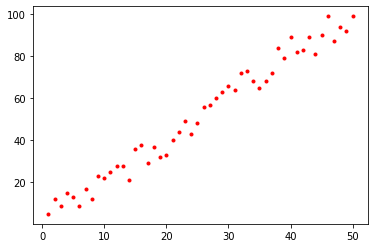

In [164]:
plt.plot(X,y,'.r')

In [165]:
torch.manual_seed(59)

model = nn.Linear(in_features=1, out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [166]:
class Model(nn.Module):
    
    def __init__(self,in_features, out_features):
            super().__init__()
            self.linear = nn.Linear(in_features, out_features)
            
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
    

In [167]:
torch.manual_seed(59)
model = Model(1,1)
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [168]:
for name, param in model.named_parameters():
    print(name,'\t',param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [169]:
x = torch.tensor([2.0])
print(model.forward(x))

tensor([1.1758], grad_fn=<AddBackward0>)


In [170]:
x = torch.tensor([20.0])
print(model.forward(x))

tensor([3.0834], grad_fn=<AddBackward0>)


In [171]:
import numpy as np
x1= np.linspace(0.0,50.0,50)

In [172]:
w1 = 0.1059
b1 = 0.9061
y1 = w1*x1 + b1

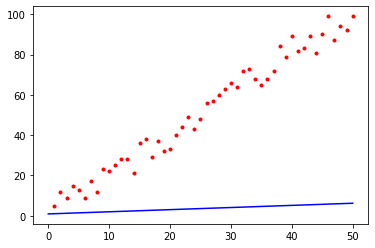

In [173]:
plt.plot(X,y,'.r')
plt.plot(x1,y1,'b')

In [174]:
criterion = nn.MSELoss()

In [175]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.0001)

In [176]:
epochs = 50
losses = []

for i in range(epochs):
    i = i + 1
    y_pred = model.forward(x)
    loss = criterion(y_pred,y)
    losses.append(loss)
    print(f"epoch {i} loss: {loss.item()} weight: {model.linear.weight.item()} bias: {model.linear.bias.item()}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch 1 loss: 3197.1982421875 weight: 0.10597813129425049 bias: 0.9637961387634277
epoch 2 loss: 2828.777587890625 weight: 0.3016446828842163 bias: 0.973579466342926
epoch 3 loss: 2517.08203125 weight: 0.48161882162094116 bias: 0.9825781583786011
epoch 4 loss: 2253.37744140625 weight: 0.6471589803695679 bias: 0.9908551573753357
epoch 5 loss: 2030.2755126953125 weight: 0.7994228601455688 bias: 0.9984683394432068
epoch 6 loss: 1841.5234375 weight: 0.9394751787185669 bias: 1.0054709911346436
epoch 7 loss: 1681.833740234375 weight: 1.0682952404022217 bias: 1.0119119882583618
epoch 8 loss: 1546.73095703125 weight: 1.186784029006958 bias: 1.0178364515304565
epoch 9 loss: 1432.4296875 weight: 1.2957699298858643 bias: 1.0232857465744019
epoch 10 loss: 1335.7271728515625 weight: 1.3960151672363281 bias: 1.028298020362854
epoch 11 loss: 1253.913330078125 weight: 1.4882208108901978 bias: 1.032908320426941
epoch 12 loss: 1184.696533203125 weight: 1.5730315446853638 bias: 1.0371488332748413
epoch 1

/usr/local/lib/python3.9/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([50, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


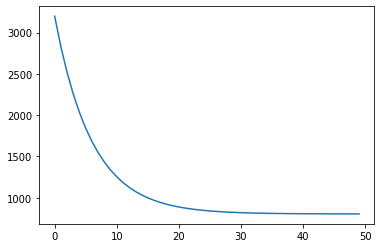

In [177]:
plt.plot(range(epochs),losses)


In [178]:
x = np.linspace(0.0,50.0,50)
cur_wt = model.linear.weight.item()
cur_bias = model.linear.bias.item()

pred_y = cur_wt*x + cur_bias

In [179]:
x

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

In [180]:
pred_y

array([  1.08391631,   3.64349278,   6.20306925,   8.76264572,
        11.3222222 ,  13.88179867,  16.44137514,  19.00095161,
        21.56052809,  24.12010456,  26.67968103,  29.2392575 ,
        31.79883398,  34.35841045,  36.91798692,  39.47756339,
        42.03713987,  44.59671634,  47.15629281,  49.71586928,
        52.27544576,  54.83502223,  57.3945987 ,  59.95417517,
        62.51375165,  65.07332812,  67.63290459,  70.19248106,
        72.75205754,  75.31163401,  77.87121048,  80.43078695,
        82.99036343,  85.5499399 ,  88.10951637,  90.66909284,
        93.22866931,  95.78824579,  98.34782226, 100.90739873,
       103.4669752 , 106.02655168, 108.58612815, 111.14570462,
       113.70528109, 116.26485757, 118.82443404, 121.38401051,
       123.94358698, 126.50316346])

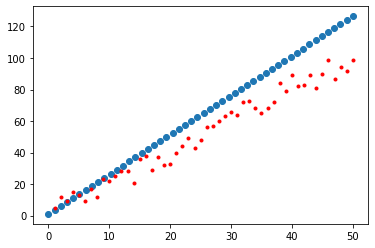

In [181]:
plt.scatter(x,pred_y)
plt.plot(X,y,'.r')